In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.read_csv(r"C:\Users\Acer\Downloads\Social_Network_Ads.csv")

In [16]:
df.head(10)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


In [4]:
df["Purchased"].value_counts()

Purchased
0    31
1    15
Name: count, dtype: int64

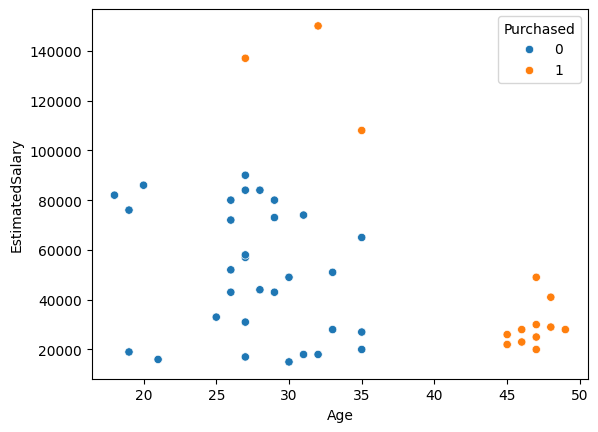

In [27]:
sns.scatterplot(x="Age",y="EstimatedSalary",data=df,hue="Purchased")
plt.show()

In [5]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
x = df.iloc[:,:-1]
y= df["Purchased"]

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     1
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    0
29    0
30    0
31    1
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    1
43    0
44    0
45    0
Name: Purchased, dtype: int64

In [8]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x),columns=x.columns)
x

,Age,EstimatedSalary
0,-1.512743,-0.985175
1,0.237853,-0.953900
2,-0.746857,-0.234566
3,-0.637445,0.203290
4,-1.512743,0.797523
5,-0.637445,0.234566
6,-0.637445,1.047726
7,-0.090384,3.111903
8,-0.856270,-0.547320
9,0.237853,0.453493


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
 from sklearn.tree import DecisionTreeClassifier

In [15]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)*100

100.0

In [26]:
dt1 = DecisionTreeClassifier(criterion="entropy")
dt1.fit(x_train,y_train)
dt1.score(x_test,y_test)*100

100.0

In [20]:
print(dt.predict([[35,65000]]))

[1]


C:\Users\Acer\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [21]:
from sklearn.tree import plot_tree

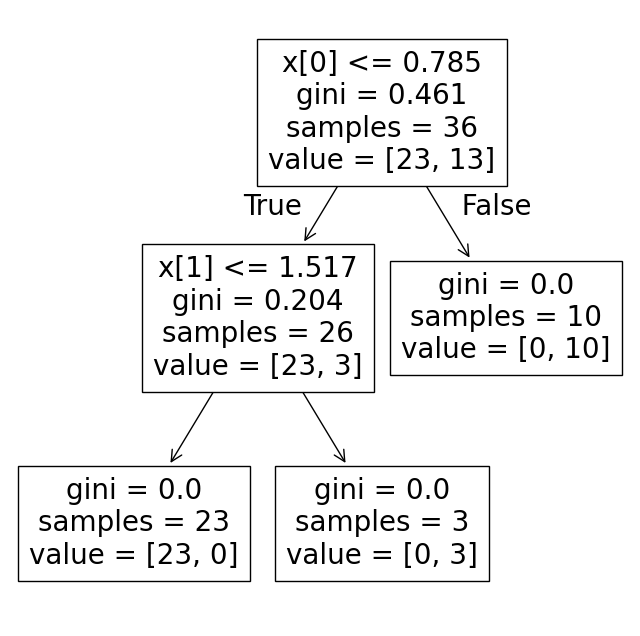

In [25]:
plt.figure(figsize=(8,8))
plot_tree(dt)
plt.savefig("tree_demo.jpg")
plt.show()

C:\Users\Acer\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


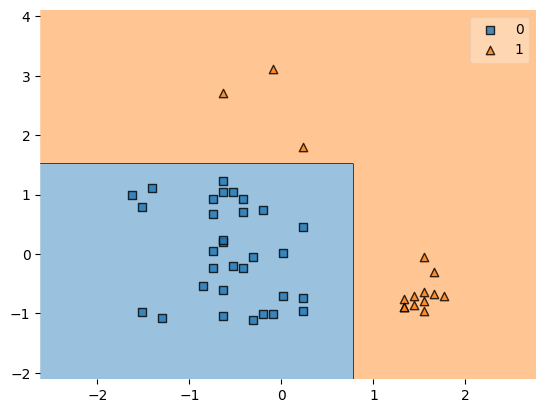

In [30]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)
plt.show()